<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,26.295877,-5.601643,30.694233,34.069815,-3.375582
1,0.0,1.0,45.357622,6.284203,61.641825,52.341559,9.300266
2,0.0,2.0,23.140092,-14.702080,18.438011,31.044820,-12.606808
3,0.0,3.0,95.585809,-2.786889,102.798920,100.488071,2.310849
4,0.0,4.0,33.112187,-8.886330,34.225858,40.603628,-6.377770
...,...,...,...,...,...,...,...
19995,999.0,15.0,39.254294,7.048181,56.302475,55.053684,1.248790
19996,999.0,16.0,66.646266,0.738255,77.384521,77.253735,0.130785
19997,999.0,17.0,61.501714,-3.452341,68.049373,73.084291,-5.034917
19998,999.0,18.0,89.892525,-16.300868,83.591656,96.093858,-12.502202


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    26.295877  -5.601643   30.694233   34.069815  -3.375582
      1.0    45.357622   6.284203   61.641825   52.341559   9.300266
      2.0    23.140092 -14.702080   18.438011   31.044820 -12.606808
      3.0    95.585809  -2.786889  102.798920  100.488071   2.310849
      4.0    33.112187  -8.886330   34.225858   40.603628  -6.377770
...                ...        ...         ...         ...        ...
999.0 15.0   39.254294   7.048181   56.302475   55.053684   1.248790
      16.0   66.646266   0.738255   77.384521   77.253735   0.130785
      17.0   61.501714  -3.452341   68.049373   73.084291  -5.034917
      18.0   89.892525 -16.300868   83.591656   96.093858 -12.502202
      19.0   92.169793 -17.142339   85.027454   97.939489 -12.912035

[20000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    26.295877  -5.601643   30.694233   34.069815  -3.375582
      1.0    45.357622   6.284203   61.641825   52.341559   9.300266
      2.0    23.140092 -14.702080   18.438011   31.044820 -12.606808
      3.0    95.585809  -2.786889  102.798920  100.488071   2.310849
      4.0    33.112187  -8.886330   34.225858   40.603628  -6.377770
...                ...        ...         ...         ...        ...
999.0 15.0   39.254294   7.048181   56.302475   55.053684   1.248790
      16.0   66.646266   0.738255   77.384521   77.253735   0.130785
      17.0   61.501714  -3.452341   68.049373   73.084291  -5.034917
      18.0   89.892525 -16.300868   83.591656   96.093858 -12.502202
      19.0   92.169793 -17.142339   85.027454   97.939489 -12.912035

[20000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,26.295877,-5.601643,30.694233,34.069815,-3.375582
1,0.0,1.0,45.357622,6.284203,61.641825,52.341559,9.300266
2,0.0,2.0,23.140092,-14.702080,18.438011,31.044820,-12.606808
3,0.0,3.0,95.585809,-2.786889,102.798920,100.488071,2.310849
4,0.0,4.0,33.112187,-8.886330,34.225858,40.603628,-6.377770
...,...,...,...,...,...,...,...
19995,999.0,15.0,39.254294,7.048181,56.302475,55.053684,1.248790
19996,999.0,16.0,66.646266,0.738255,77.384521,77.253735,0.130785
19997,999.0,17.0,61.501714,-3.452341,68.049373,73.084291,-5.034917
19998,999.0,18.0,89.892525,-16.300868,83.591656,96.093858,-12.502202


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    26.295877  -5.601643   30.694233   34.069815  -3.375582
      1.0    45.357622   6.284203   61.641825   52.341559   9.300266
      2.0    23.140092 -14.702080   18.438011   31.044820 -12.606808
      3.0    95.585809  -2.786889  102.798920  100.488071   2.310849
      4.0    33.112187  -8.886330   34.225858   40.603628  -6.377770
...                ...        ...         ...         ...        ...
999.0 15.0   39.254294   7.048181   56.302475   55.053684   1.248790
      16.0   66.646266   0.738255   77.384521   77.253735   0.130785
      17.0   61.501714  -3.452341   68.049373   73.084291  -5.034917
      18.0   89.892525 -16.300868   83.591656   96.093858 -12.502202
      19.0   92.169793 -17.142339   85.027454   97.939489 -12.912035

[20000 rows x 5 columns]

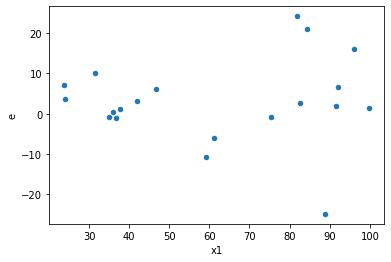

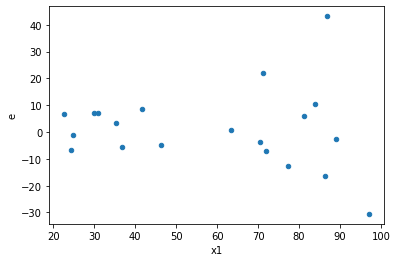

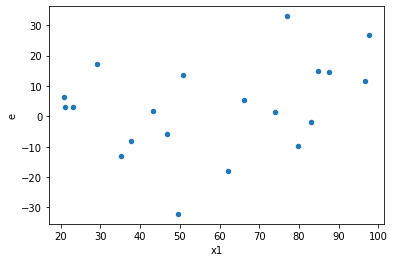

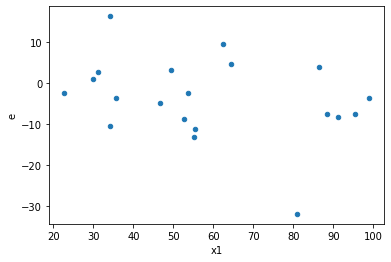

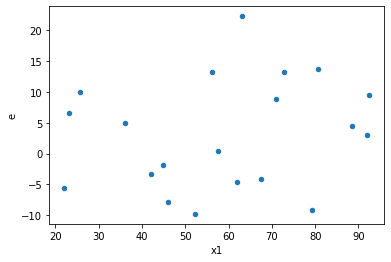

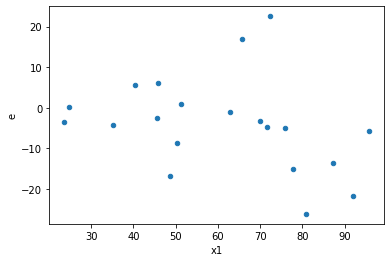

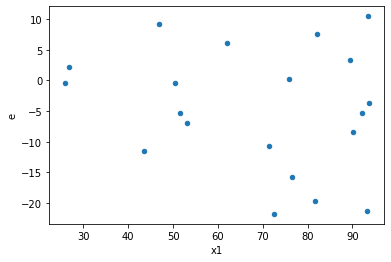

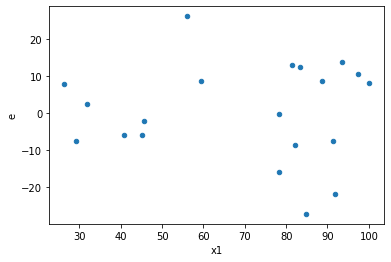

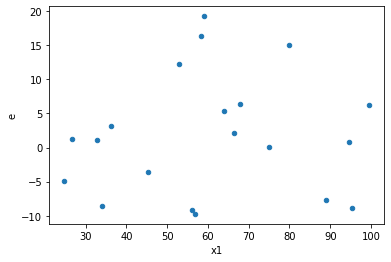

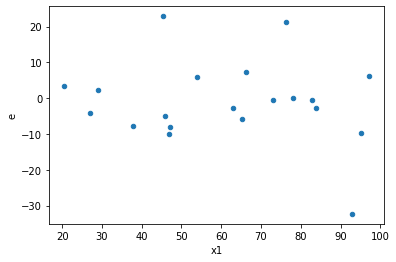

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,8.0,171.92983176644663,240.9165856425663,17.192983176644663,30.114573205320788,1.7515618375192215,0.4387282097744769,0.7806358951127615,0.21936410488723845,Reject005=1 : Homoscedasticity
2.0,12.0,6.0,965.9068279433419,818.9560333179559,80.49223566194516,136.4926722196593,1.6957247006146936,0.5338724106562469,0.7330637946718765,0.26693620532812345,Reject005=1 : Homoscedasticity
3.0,11.0,7.0,1278.704611402951,2578.668649535908,116.24587376390464,368.3812356479869,3.168983325775237,0.13658122444028353,0.9317093877798582,0.06829061222014177,Reject005=1 : Homoscedasticity
6.0,8.0,10.0,403.9007716762599,1203.2764632983074,50.48759645953249,120.32764632983074,2.3833110460363747,0.19870329467626013,0.9006483526618699,0.09935164733813007,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,1048.0305409196092,1591.1344909137738,116.44783787995658,176.79272121264154,1.5182138580786113,0.543817028169451,0.7280914859152745,0.2719085140847255,Reject005=1 : Homoscedasticity
10.0,10.0,8.0,160.11622382345124,1698.0424984950434,16.011622382345124,212.25531231188043,13.256327637723912,0.001219821626333939,0.999390089186833,0.0006099108131669695,Reject005=0 : Heteroscedasticity
11.0,8.0,10.0,307.54570041985926,3762.843718610117,38.44321255248241,376.28437186101166,9.788057419689128,0.0015508271571282872,0.9992245864214359,0.0007754135785641436,Reject005=0 : Heteroscedasticity
17.0,7.0,11.0,693.8012133203457,2160.237774025283,99.11445904576367,196.38525218411667,1.981398618070857,0.2987728071330453,0.8506135964334773,0.14938640356652266,Reject005=1 : Homoscedasticity
20.0,8.0,10.0,1079.1862155080407,1743.639275211775,134.8982769385051,174.3639275211775,1.2925585965835817,0.6902636209146553,0.6548681895426723,0.34513181045732766,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,8.0,171.92983176644663,240.9165856425663,17.192983176644663,30.114573205320788,1.7515618375192215,0.4387282097744769,Reject005=1 : Homoscedasticity
1.0,6.0,12.0,999.7694254867406,1168.7565423388196,166.62823758112344,97.39637852823496,0.5845130449802498,0.5264410330576075,Reject005=1 : Homoscedasticity
2.0,12.0,6.0,965.9068279433419,818.9560333179559,80.49223566194516,136.4926722196593,1.6957247006146936,0.5338724106562469,Reject005=1 : Homoscedasticity
3.0,11.0,7.0,1278.704611402951,2578.668649535908,116.24587376390464,368.3812356479869,3.168983325775237,0.13658122444028353,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,1104.6022554055107,853.1841167208862,122.73358393394564,94.79823519120959,0.7723903446201761,0.7066941258345281,Reject005=1 : Homoscedasticity
5.0,12.0,6.0,1307.243630314323,291.27482986071084,108.93696919286025,48.54580497678514,0.44563205068465267,0.22000945787784987,Reject005=1 : Homoscedasticity
6.0,8.0,10.0,403.9007716762599,1203.2764632983074,50.48759645953249,120.32764632983074,2.3833110460363747,0.19870329467626013,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,1048.0305409196092,1591.1344909137738,116.44783787995658,176.79272121264154,1.5182138580786113,0.543817028169451,Reject005=1 : Homoscedasticity
8.0,10.0,8.0,2296.970590088357,518.4173417244232,229.69705900883568,64.8021677155529,0.28212014553072784,0.06512936258100142,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      765
Reject005=0 : Heteroscedasticity    235
Name: Result_test, dtype: int64